b) [30 points] Train a generalized linear model (i.e., logistic regression) with lasso
regularization (Friedman et al., 2010) on the provided training data. You might
want to use ‘pandas’ Python module and DataFrames for loading data from
large .csv files. Follow the same pre-processing (if any) as in (Liu et al., 2019).
You should use a stochastic optimization strategy by splitting your dataset into
smaller chunks that you feed to the optimizer. You are allowed to use any
libraries you might consider appropriate (e.g., scikit-learn (Pedregosa et al.,
2011)) for solving the regression task.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.io
import sklearn.linear_model as lm
import sklearn as skl
import statsmodels.formula.api as smf
import statsmodels as sm

# inline plots
%matplotlib inline

# set random number generator seed


# mount GDrive
from google.colab import drive
drive.mount('gdrive/')

# ============================================================================
# data loading
# ============================================================================

# PLEASE, SPECIFY YOUR PATH TO THE DATA HERE
datapath = 'gdrive/My Drive/bmdslab/final-project/'

# get the list of files to process
file1 = '/'.join((datapath,'glm.training.data.csv'))
file2 = '/'.join((datapath,'glm.test.data.csv'))


# get data as dictionary
training = pd.read_csv(file1)
testing = pd.read_csv(file2)


training.keys()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at gdrive/


Index(['Unnamed: 0', 'x.hr', 'x.sbp', 'x.dbp', 'x.mbp', 'x.resp', 'x.temp',
       'x.cvp', 'x.pao2', 'x.fio2', 'x.gcs', 'x.bili', 'x.platelets',
       'x.creat', 'x.lactate', 'x.bun', 'x.ph', 'x.wbc', 'x.paco2', 'x.hgb',
       'x.hct', 'x.potassium', 'x.urine', 'x.resp.sofa', 'x.nervous.sofa',
       'x.cardio.sofa', 'x.liver.sofa', 'x.coag.sofa', 'x.kidney.sofa', 'y'],
      dtype='object')

In [0]:
#preprocess data
training = training.drop(['Unnamed: 0'], axis = 1)
y_train=training['y']
y_train=y_train.to_numpy()

training=training.drop(['y'], axis=1)
training=training.to_numpy()

#normalizes data
from sklearn.preprocessing import scale
training = scale( training, axis=0, with_mean=True, with_std=True, copy=True )

In [4]:
#b 
from sklearn.linear_model import SGDClassifier
model=SGDClassifier(alpha=0.0001, average=False,
           early_stopping=True, fit_intercept=True,
           l1_ratio=1, learning_rate='optimal', loss='log', max_iter=80,
           n_iter_no_change=5, penalty='l1', power_t=0.5, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(training,y_train)
y_pred=model.predict(training)

acc=model.score(training, y_train)
print(acc)

0.9074419489912448


c) [20 points] Determine the optimal regularization value λ ≥ 0 via cross-validation
as described in (Liu et al., 2019).

In [5]:
#first do a simple run to determine a range of lambda 
lam_acc1=np.zeros(10)
lam1=np.linspace(0.0001,0.05,10)

for i in range(len(lam1)):
      model=SGDClassifier(alpha=lam1[i], average=False,
           early_stopping=True, fit_intercept=True,
           l1_ratio=1, learning_rate='optimal', loss='log', max_iter=80,
           n_iter_no_change=5, penalty='l1', power_t=0.5, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
      model.fit(training,y_train)
    
      acc=model.score(training, y_train)
      lam_acc1[i]=lam_acc1[i]+acc
print(lam_acc1)

[0.9035243  0.89972656 0.89290889 0.88680053 0.8821241  0.8747107
 0.85179546 0.84167301 0.83835046 0.83500063]


In [6]:
#narrow the range just a little more
lam_acc2=np.zeros(10)
smaller_lam = np.linspace(0.00001,0.005,10)

for j in range(len(smaller_lam)):
      model=SGDClassifier(alpha=smaller_lam[j], average=False,
           early_stopping=True, fit_intercept=True,
           l1_ratio=1, learning_rate='optimal', loss='log', max_iter=80,
           n_iter_no_change=5, penalty='l1', power_t=0.5, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
      model.fit(training,y_train)
    
      acc=model.score(training, y_train)
      lam_acc2[j]=lam_acc2[j]+acc
print(lam_acc2)

[0.86237026 0.90723258 0.90700482 0.90685383 0.90720213 0.90208159
 0.90193884 0.90167936 0.90085776 0.89918475]
[0.86237026 0.90723258 0.90700482 0.90685383 0.90720213 0.90208159
 0.90193884 0.90167936 0.90085776 0.89918475]


In [7]:
#now do 10-fold cross validation 
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

lam=np.linspace(0.0001,0.001,5)

kf = KFold(n_splits=10)
kf.get_n_splits(training)

lam_acc=np.zeros(5)

KFold(n_splits=10, random_state=None, shuffle=True)
for train_index, test_index in kf.split(training):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = training[train_index], training[test_index]
    Y_train, Y_test = y_train[train_index], y_train[test_index]

    for k in range(len(lam)):
      model=SGDClassifier(alpha=lam[k], average=False,
           early_stopping=True, fit_intercept=True,
           l1_ratio=1, learning_rate='optimal', loss='log', max_iter=20,
           n_iter_no_change=5, penalty='l1', power_t=0.5, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
      model.fit(X_train,Y_train)
    
      y_score=model.predict(X_test)
      acc=accuracy_score(Y_test, y_score)
      lam_acc[k]=lam_acc[k]+acc
lam_opti=lam[np.argmax(lam_acc)]

TRAIN: [ 157620  157621  157622 ... 1576197 1576198 1576199] TEST: [     0      1      2 ... 157617 157618 157619]
TRAIN: [ 157620  157621  157622 ... 1576197 1576198 1576199] TEST: [     0      1      2 ... 157617 157618 157619]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [157620 157621 157622 ... 315237 315238 315239]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [157620 157621 157622 ... 315237 315238 315239]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [315240 315241 315242 ... 472857 472858 472859]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [315240 315241 315242 ... 472857 472858 472859]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [472860 472861 472862 ... 630477 630478 630479]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [472860 472861 472862 ... 630477 630478 630479]
TRAIN: [      0       1       2 ... 1576197 1576198 1576199] TEST: [630480 63048

d) [20 points] Evaluate the ROC curve on the test data and compute the operating
point corresponding to the optimal threshold as defined in (Liu et al., 2019).
Plot the obtained ROC curve overlaying the operating point and its associated
probability of detection (True Positive Rate) and probability of false alarm
(False Positive Rate). Add also to the figure the Area Under the Curve (AUC)
value

In [0]:
#preprocess testing data
testing_roc=testing.drop(['Unnamed: 0'], axis=1)
y_test_roc=testing_roc['y']
y_test_roc=y_test_roc.to_numpy()

testing_roc=testing_roc.drop(['y'], axis=1)
testing_roc=testing_roc.drop(['patient'], axis=1)
testing_roc=testing_roc.to_numpy()


#normalizes data
testing_roc = scale( testing_roc, axis=0, with_mean=True, with_std=True, copy=True )

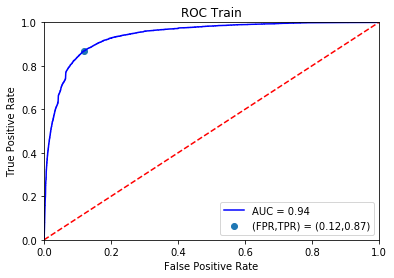

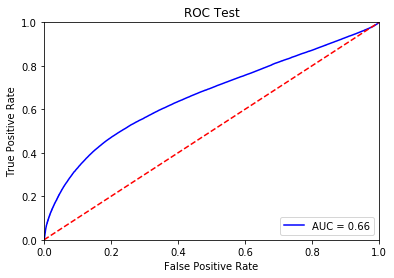

In [11]:
model=SGDClassifier(alpha=lam_opti, average=False, class_weight='balanced',
           early_stopping=True, fit_intercept=True,
           l1_ratio=1, learning_rate='optimal', loss='log', max_iter=80,
           n_iter_no_change=5, penalty='l1', power_t=0.5, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)
model.fit(training,y_train)

y_pred_train=model.predict_proba(training)
y_pred_train=y_pred_train[:,1]

fpr_train, tpr_train, threshold_train = skl.metrics.roc_curve(y_train, y_pred_train)

distance=[]
for k in range(len(fpr_train)):
  distance.append(np.sqrt((tpr_train[k]-1)**2+(fpr_train[k])**2))

opt_index = np.argmin(distance)
opt_thres=threshold_train[opt_index]

roc_auc_train = skl.metrics.auc(fpr_train, tpr_train)
plt.figure()
plt.title('ROC Train')
plt.plot(fpr_train, tpr_train, 'b', label = 'AUC = %0.2f' % roc_auc_train)
plt.scatter(fpr_train[opt_index], tpr_train[opt_index], label = '(FPR,TPR) = (%0.2f,%0.2f)' %(fpr_train[opt_index],tpr_train[opt_index]))
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

y_pred_test = model.predict_proba(testing_roc)
y_pred_test=y_pred_test[:,1]

fpr, tpr, threshold = skl.metrics.roc_curve(y_test_roc, y_pred_test)

roc_auc = skl.metrics.auc(fpr, tpr)
plt.figure()
plt.title('ROC Test')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

e) [10 points] Generate a histogram of EWT values on the test data.

In [0]:
#load data
file3 = ''.join((datapath,'test.onsets.csv'))
file4 = ''.join((datapath,'timestamps.test.csv'))
onsets = pd.read_csv(file3)
timestamps = pd.read_csv(file4)
onsets.head(5)

,Unnamed: 0,x
0,1,2106-06-17 21:15:00
1,2,2120-12-31 17:15:00
2,3,2132-11-01 00:08:00
3,4,2157-03-07 13:41:00
4,5,2122-02-15 03:00:00


In [0]:
#predicted classification for the testing set
phatTesting = model.predict_proba(testing_roc)
phatTesting=phatTesting[:,1]
phatTesting[phatTesting > opt_thres] = 1
phatTesting[phatTesting < opt_thres] = 0
phatTesting = phatTesting.astype(int)

testing = testing.assign(predy = phatTesting)

#drop Unnamed column in timestamps and append the times to the testing dataframe
timestamps = timestamps.drop(['Unnamed: 0'], axis=1)
testing['timestamps'] = timestamps

In [0]:
#select patients who undergo septic shock
sepspatients = testing[testing['patient'] == 6737-1113]
for v in reversed(range(1113)):
  sepspatients = sepspatients.append(testing[testing['patient'] == 6737-v])

In [0]:
#find the first time point we predict onset will occur for these patients
sepsdet = testing[testing['patient'] == 6737-1113][testing['predy']==1]
nodet = []
for b in reversed(range(1113)):
  current = testing[testing['patient'] == 6737-b][testing['predy']==1]
  if len(current) > 0:
    sepsdet = sepsdet.append(current.head(1))
  else:
    nodet.append(6737-b)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


In [0]:
#eliminate the patients in the onset data that we failed to predict septic shock at all
onsets = onsets.drop(['Unnamed: 0'], axis=1)
patno = np.linspace(5624,6737,1114)
indexes = []
for a in range(1114):
  for b in range(len(nodet)):
    if patno[a] == nodet[b]:
      indexes.append(a)
print(indexes)
for i in indexes:
  onsets = onsets.drop([i], axis = 0)

[222, 242, 403, 677, 891]


In [0]:
#Early warning time (EWT) is defined as the difference between shock onset time (to) and detection time (td)
to = np.asarray(onsets)
td = np.asarray(sepsdet['timestamps'])
days31 = [1, 3, 5, 7, 8, 10, 12]
days30 = [4, 6, 9, 11]
tdiff = []
for d in range(len(to)):
  to_mon = np.asfarray(to[d][0][5:7],float)
  td_mon = np.asfarray(td[d][5:7],float)
  to_day = np.asfarray(to[d][0][8:10],float)
  td_day = np.asfarray(td[d][8:10],float)
  to_hour = np.asfarray(to[d][0][11:13],float)
  td_hour = np.asfarray(td[d][11:13],float)
  to_min = np.asfarray(to[d][0][14:16],float)/60
  td_min = np.asfarray(td[d][14:16],float)/60
  to_time = to_hour+to_min
  td_time = td_hour+td_min
  if to[d][0][:11] == td[d][:11]:
    tdiff.append(to_time - td_time)
  elif to[d][0][:8] == td[d][:8]:
    hrs = (to_day-td_day-1)*24
    tdiff.append(24-to_time + hrs + td_time)
  else:
    if td_mon in days31:
      hrs = (to_day + 30 - td_day)*24
      tdiff.append(24-to_time + hrs + td_time)
    elif td_mon in days30:
      hrs = (to_day + 29 - td_day)*24
      tdiff.append(24-to_time + hrs + td_time)
    else:
      hrs = (to_day + 27 - td_day)*24
      tdiff.append(24-to_time + hrs + td_time)
print(tdiff)
print(len(tdiff))
#append on the patients we failed as individuals with 0 EWT
for ind in range(len(indexes)):
  tdiff.append(0)
print(tdiff)
print(len(tdiff))

[0.0, 6.916666666666666, 40.86666666666667, 2.6833333333333336, 35.333333333333336, 3.666666666666667, 0.0, 0.0, 0.0, 0.4166666666666661, 12.983333333333334, 1.0, 0.0, 19.583333333333336, 1.0833333333333321, 316.68333333333334, 4.916666666666666, 0.5, 63.0, 28.71666666666667, 6.25, 89.55, 29.683333333333334, 9.55, 2.9833333333333325, 76.55, 11.283333333333333, 148.13333333333333, 504.28333333333336, 81.2, 1.6666666666666665, 177.25, 8.75, 615.5833333333334, 34.15, 6.85, 11.666666666666668, 30.95, 1.5, 0.0, 31.75, 2.3166666666666664, 19.03333333333333, 1.583333333333333, 0.7166666666666668, 72.75, 3.166666666666666, 4.0, 3.6833333333333336, 6.933333333333334, 4.983333333333334, 128.0, 27.5, 1.216666666666665, 511.2, 3.333333333333334, 45.5, 0.0, 32.61666666666667, 167.25, 313.01666666666665, 4.25, 7.133333333333333, 33.45, 29.083333333333332, 0.43333333333333357, 27.75, 288.5, 6.783333333333335, 81.61666666666667, 45.0, 1.8833333333333333, 2.75, 0.0, 53.0, 0.34999999999999964, 34.75, 0.

In [0]:
count = 0
for i in tdiff:
  if i == 0:
    count += 1
print(count)    

119


The median is at 7.74 hours
The ratio of patients with EWTs above 48 hours is 0.19
The ratio of patients with EWTs of 0 hours is 0.11


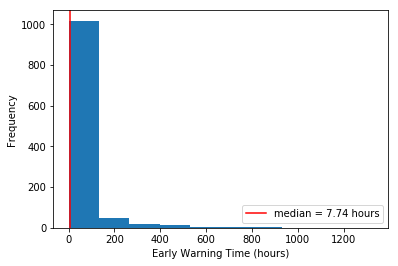

In [0]:
import statistics
med = statistics.median(tdiff)
print('The median is at %0.2f hours' %med)
plt.hist(tdiff)
plt.axvline(x = med, color = 'r', label = 'median = %0.2f hours' %med)
plt.xlabel('Early Warning Time (hours)')
plt.ylabel('Frequency')
plt.legend(loc = 'lower right')

abv48 = 0
for num in range(len(tdiff)):
  if tdiff[num] > 48:
    abv48 += 1
print('The ratio of patients with EWTs above 48 hours is %0.2f' %(abv48/len(tdiff)))
print('The ratio of patients with EWTs of 0 hours is %0.2f'%(count/len(tdiff)))

f) [20 points] Write a short 2 to 3 pages report using the provided templates where
you introduce the problem, describe the training procedure and methodology
used, as well as a description of the obtained results. We will be evaluating your
clarity in exposition and presentation of the research problem.

g) [10 points] (Optional) Repeat the training and estimation procedure using data
balancing and compare the results.

28
(28,)


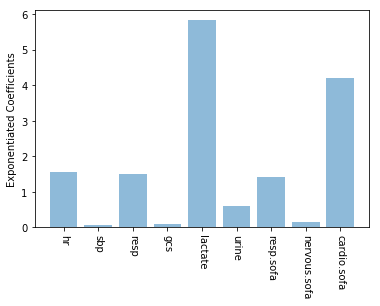

In [0]:
coefficients=model.coef_
names=list(testing.columns.values) 
names.remove('Unnamed: 0')
names.remove('patient')
names.remove('y')
names.remove('predy')
names.remove('timestamps')

coefficients1=np.asarray(coefficients).squeeze()
names1=np.asarray(names)
print(len(names))
print(np.shape(coefficients1))
zero_in_list=[i for i,x in enumerate(coefficients1) if abs(x)<0.2] 
names

coefficients1=np.delete(coefficients1, zero_in_list)
names1=np.delete(names1, zero_in_list)
coefficients_exp=np.exp(coefficients1)

plt.bar(names1, coefficients_exp, align='center', alpha=0.5)
plt.xticks(names1,rotation=270)
plt.ylabel('Exponentiated Coefficients')
plt.show()

In [0]:
print(coefficients_exp)
print(names1)
print(model.intercept_)

[1.56089164 0.08211133 1.48957393 1.1728034  1.19455207 0.10845833
 5.82657839 0.87750138 0.59330067 1.40650503 0.14898198 4.19249238
 1.18047114 1.10858153]
['hr' 'sbp' 'resp' 'pao2' 'fio2' 'gcs' 'lactate' 'paco2' 'urine'
 'resp.sofa' 'nervous.sofa' 'cardio.sofa' 'liver.sofa' 'kidney.sofa']
[-1.42781584]
